In [9]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/537.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/8794.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/8816.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/6364.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/9100.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/3769.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/7899.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/6665.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/2789.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/766.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/6129.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/7283.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/4982.jpg
/kaggle/input/handwritten-math-symbol-dataset/eval/plus val/3550.jpg
/kaggle/input/handwritten-math-symbo

In [2]:
import os
import cv2
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam

In [22]:
DATASET_PATH = "/kaggle/input/handwritten-math-symbol-dataset/train"
IMAGE_SIZE = 45

In [30]:
X, y = [], []
labels = sorted(os.listdir(DATASET_PATH))
label_map = {label: idx for idx, label in enumerate(labels)}

for label in labels:
    label_folder = os.path.join(DATASET_PATH, label)
    if not os.path.isdir(label_folder):
        continue
    
    for img_file in os.listdir(label_folder):
        if not img_file.lower().endswith(('.png', '.jpg', '.jpeg')):
            continue
        
        img_path = os.path.join(label_folder, img_file)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        
        if img is None:
            print(f"Skipped unreadable image: {img_path}")
            continue
        
        img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))
        X.append(img)
        y.append(label_map[label])


print(f" Loaded {len(X)} images across {len(label_map)} classes.")

X = np.array(X).reshape(-1, IMAGE_SIZE, IMAGE_SIZE, 1) / 255.0
y = to_categorical(np.array(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

np.savez("processed_data.npz", X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test, label_map=label_map)


 Loaded 7691 images across 20 classes.


In [24]:
data = np.load("processed_data.npz", allow_pickle=True)
X_train = data['X_train']
X_test = data['X_test']
y_train = data['y_train']
y_test = data['y_test']
label_map = data['label_map'].item()
num_classes = y_train.shape[1]

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=X_train.shape[1:]),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

model.save("math_symbol_model.h5")
np.save("label_map.npy", label_map)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - accuracy: 0.2279 - loss: 2.4902 - val_accuracy: 0.7000 - val_loss: 1.1061
Epoch 2/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.6419 - loss: 1.1625 - val_accuracy: 0.8468 - val_loss: 0.5918
Epoch 3/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 76ms/step - accuracy: 0.7676 - loss: 0.7617 - val_accuracy: 0.8883 - val_loss: 0.4146
Epoch 4/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 80ms/step - accuracy: 0.8334 - loss: 0.5403 - val_accuracy: 0.9013 - val_loss: 0.3283
Epoch 5/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8671 - loss: 0.4348 - val_accuracy: 0.9182 - val_loss: 0.2857
Epoch 6/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 73ms/step - accuracy: 0.8849 - loss: 0.3493 - val_accuracy: 0.9195 - val_loss: 0.2622
Epoch 7/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.9004 - loss: 0.3174 - val_accuracy: 0.9325 - val_loss: 0.2224
Epoch 8/10
109/109 ━━━━━━━━━━━━━━━━━━━━ 9s 78ms/step - accuracy: 0.9117 - loss: 0.2769 - val_acc

In [29]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 93.90%


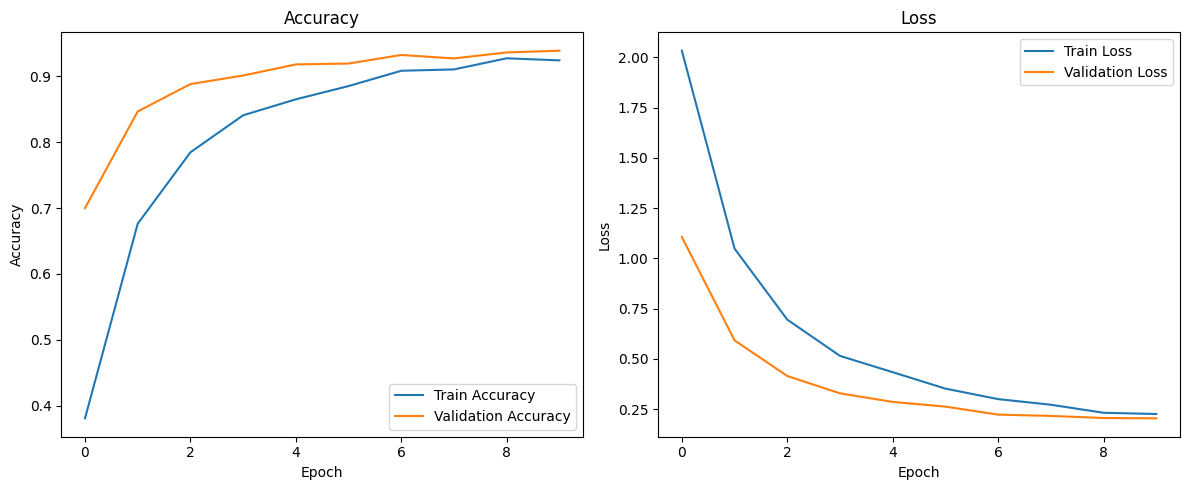

In [26]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.tight_layout()
plt.show()

25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


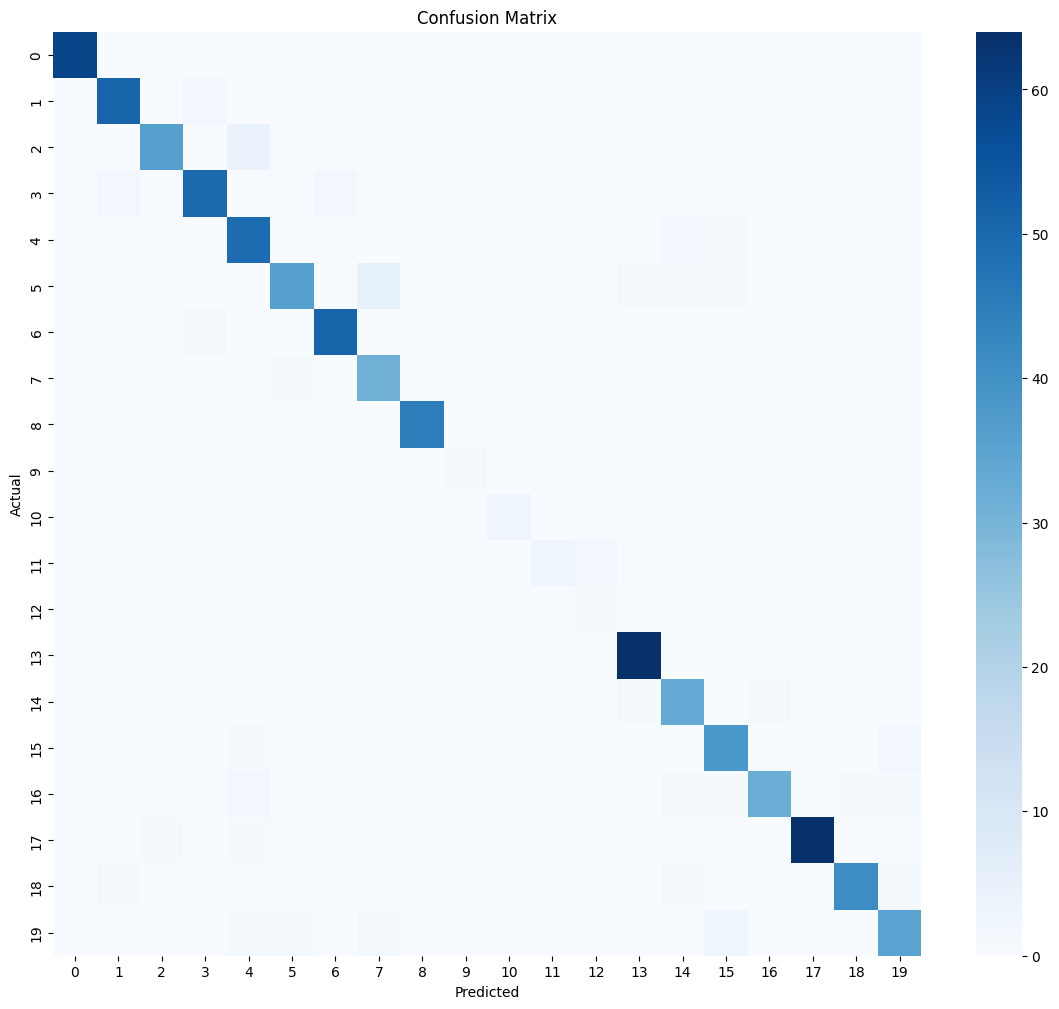

In [27]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(14, 12))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()